<a href="https://colab.research.google.com/github/jangelcode/super-duper/blob/main/machinelearning/Horses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
folder = 'RDR Horses'
file = 'rdr_horses.txt'

In [ ]:
folder = 'Horses'
file = 'horses.txt'

In [ ]:
path = Path('data/allHorses')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
classes = ['rdr horses','horses']

In [ ]:
download_images('/rdr_horses.txt', dest, max_pics=200)

In [ ]:
download_images('/rdr_horses.txt', dest, max_pics=20, max_workers=0)

In [ ]:
download_images('/horses.txt', dest, max_pics=200)

In [ ]:
download_images('/horses.txt', dest, max_pics=20, max_workers= 0)

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

rdr horses
horses


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['Horses', 'RDR Horses']

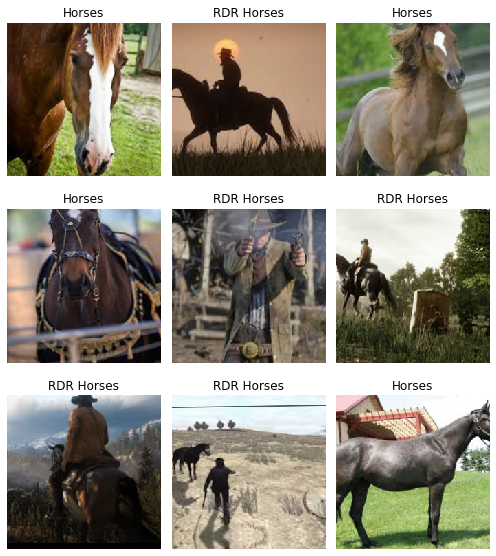

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Horses', 'RDR Horses'], 2, 256, 64)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.098172,0.636686,0.140625,00:04
1,0.102148,0.580009,0.140625,00:04
2,0.102122,0.628029,0.109375,00:04
3,0.119728,0.559287,0.093750,00:04
4,0.105618,0.523424,0.093750,00:04


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

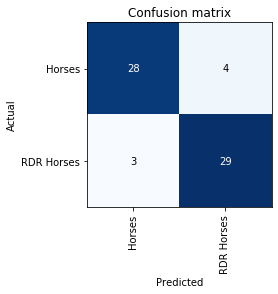

In [ ]:
interp.confusion_matrix(1)
interp.plot_confusion_matrix()

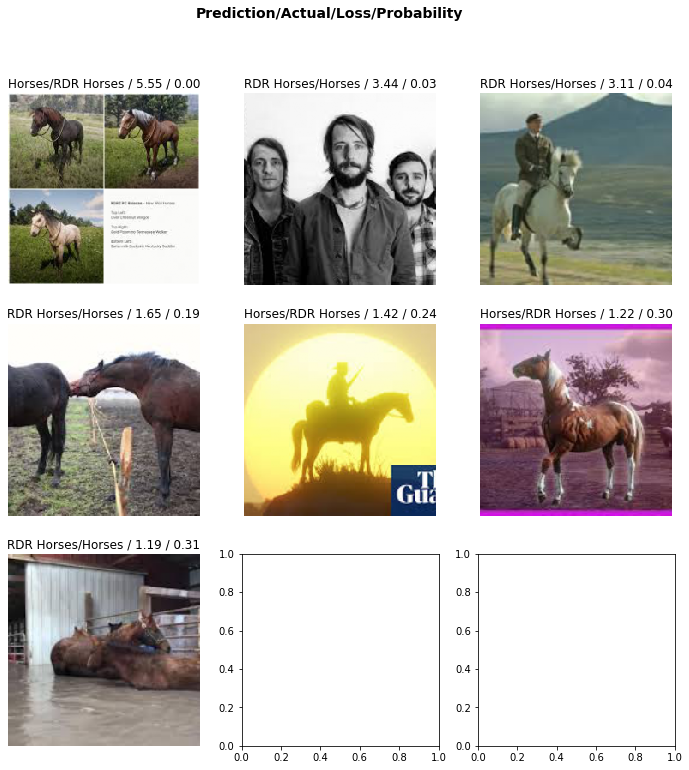

In [ ]:
interp.plot_top_losses(7)

In [ ]:
learn.unfreeze()
learn.lr_find()

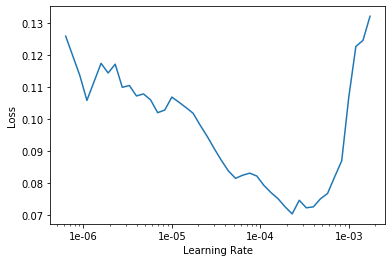

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.096297,0.489153,0.125000,00:05
1,0.074213,0.472335,0.125000,00:04
